
# Titanic EDA Template

**Task 5 — Exploratory Data Analysis (EDA)**


This notebook is a ready-to-use template for your Task 5 (Titanic dataset). It uses `seaborn`'s built-in Titanic dataset for convenience (`sns.load_dataset('titanic')`) so you can run it without downloading files. If you prefer to use Kaggle's `train.csv`, replace the data-loading cell accordingly.

---

**How to use:**
1. Open this notebook in Jupyter or Google Colab.
2. Run each cell sequentially.
3. Add your observations in the markdown placeholders after each visualization.
4. Save the notebook and export to PDF for submission.

---

> Notebook created for: Task 5 — Exploratory Data Analysis (Titanic)


In [1]:

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set visualization defaults (you can modify if needed)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)


In [2]:

# 2. Load the Titanic dataset (seaborn built-in). 
# If you have 'train.csv' from Kaggle, use: pd.read_csv('train.csv')
df = sns.load_dataset('titanic')
df_original = df.copy()  # keep a copy of original data
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:

# 3. Basic exploration
print('Shape:', df.shape)
print('\nInfo:')
df.info()
print('\n\nDescribe (numeric columns):')
display(df.describe(include=[np.number]).T)
print('\n\nDescribe (object/category columns):')
display(df.describe(include=['object','category']).T)


Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Describe (numeric columns):


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292




Describe (object/category columns):


,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549


In [4]:

# 4. Missing values & value counts
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])

# Example: value counts for key categorical columns
for col in ['sex','class','embark_town','who','alone']:
    if col in df.columns:
        print('\nValue counts for', col)
        display(df[col].value_counts(dropna=False))


deck           688
age            177
embarked         2
embark_town      2
dtype: int64


Value counts for sex


sex
male      577
female    314
Name: count, dtype: int64


Value counts for class


class
Third     491
First     216
Second    184
Name: count, dtype: int64


Value counts for embark_town


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64


Value counts for who


who
man      537
woman    271
child     83
Name: count, dtype: int64


Value counts for alone


alone
True     537
False    354
Name: count, dtype: int64


## Data cleaning suggestions

- Handle missing values (e.g., `age`, `embarked`, `deck`).
- Consider imputing `age` (median or model-based), or create an `age_missing` flag.
- Drop or fill `deck` or create 'HasDeck' boolean if useful.
- Convert categorical columns to `category` dtype if needed.

(Add your chosen cleaning steps in the code cell below.)


In [5]:

# 5. Example cleaning (copy/modify as needed)
df_clean = df.copy()

# Simple imputation examples (modify based on your strategy)
if 'age' in df_clean.columns:
    df_clean['age_median'] = df_clean['age'].median()
    df_clean['age'] = df_clean['age'].fillna(df_clean['age_median'])

if 'embarked' in df_clean.columns:
    df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])

# Create useful features
if 'alone' in df_clean.columns:
    df_clean['is_alone'] = df_clean['alone'].map({True:1, False:0})

# Show counts after basic cleaning
df_clean.isnull().sum().sort_values(ascending=False).head(10)


deck           688
embark_town      2
survived         0
pclass           0
sex              0
parch            0
fare             0
age              0
sibsp            0
class            0
dtype: int64


## Univariate Analysis

Check distributions and outliers for numeric variables (histograms, boxplots). Add observations after each plot.


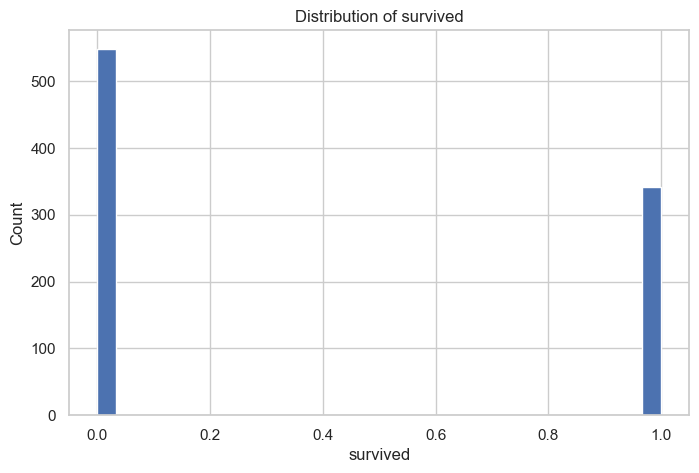


Observation:  (add your notes here)
---



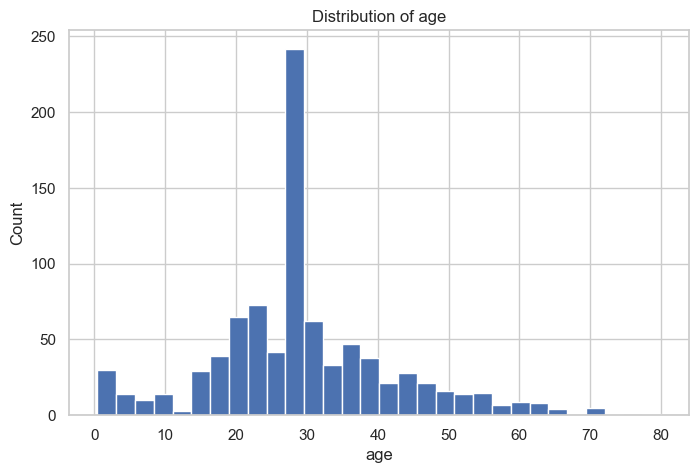


Observation:  (add your notes here)
---



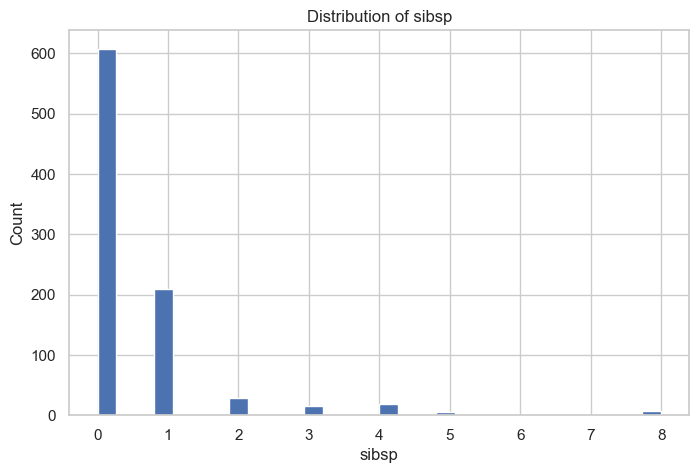


Observation:  (add your notes here)
---



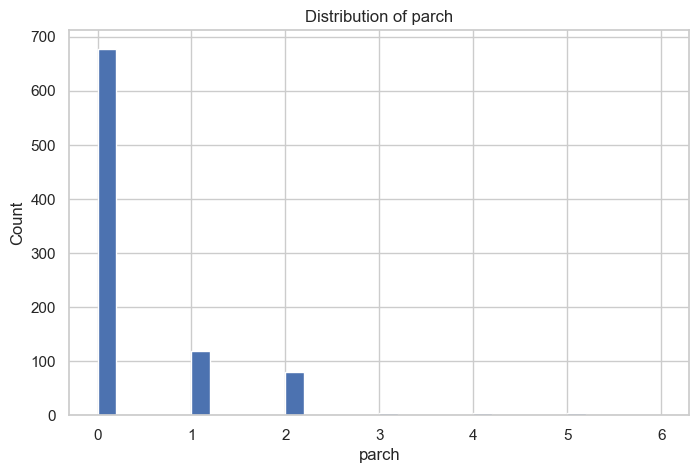


Observation:  (add your notes here)
---



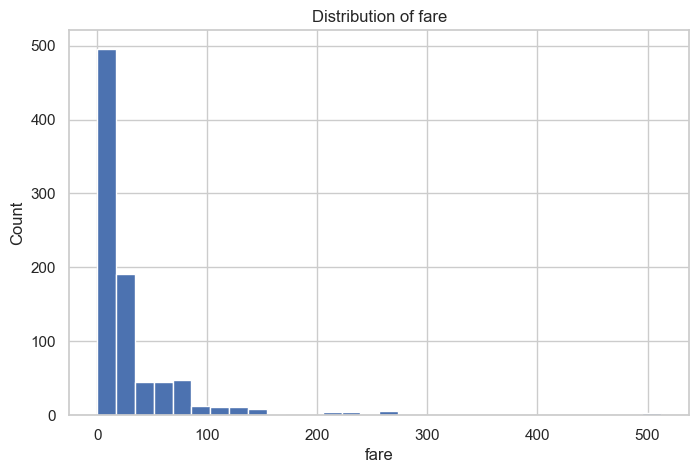


Observation:  (add your notes here)
---



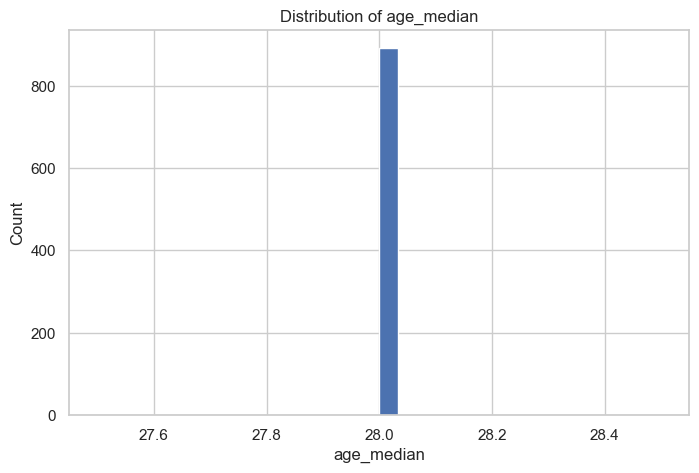


Observation:  (add your notes here)
---



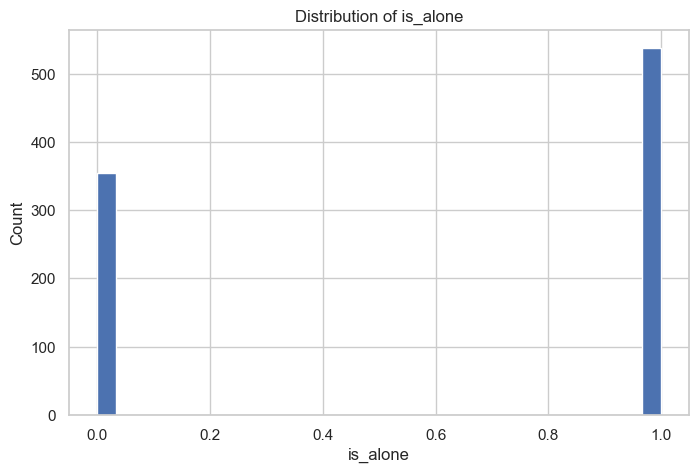


Observation:  (add your notes here)
---



In [6]:

# 6. Histograms for numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['pclass']]  # example exclusion if needed
for col in numeric_cols:
    plt.figure()
    plt.hist(df_clean[col].dropna(), bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    print('\nObservation:  (add your notes here)\n---\n')


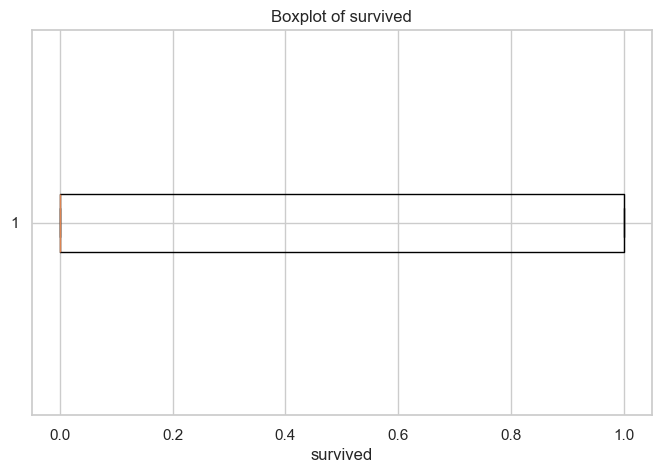


Observation:  (add your notes here)
---



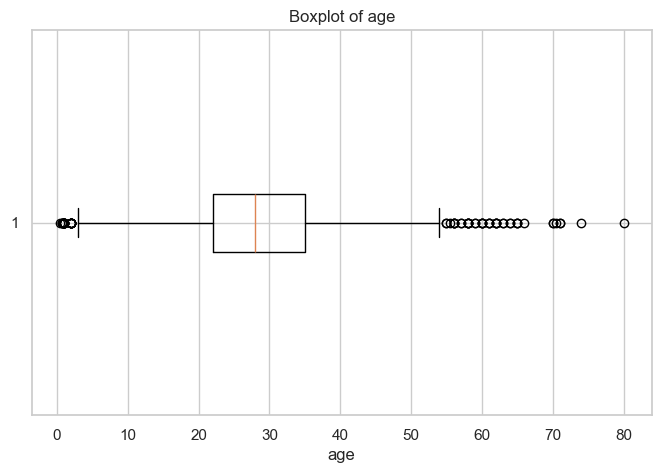


Observation:  (add your notes here)
---



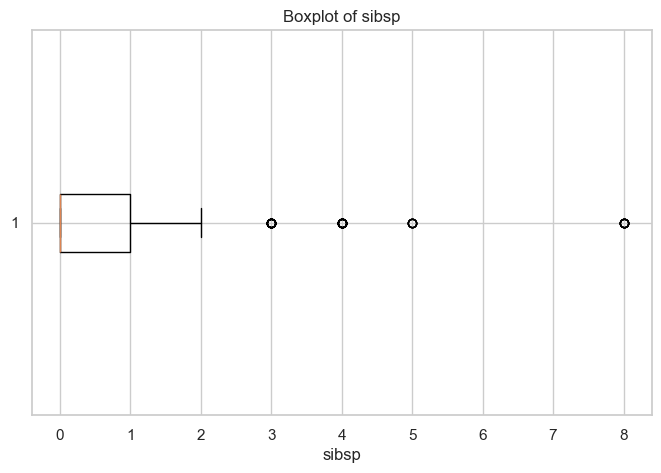


Observation:  (add your notes here)
---



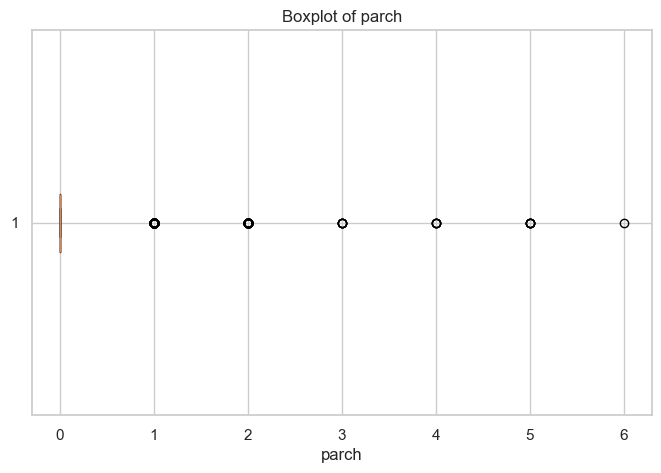


Observation:  (add your notes here)
---



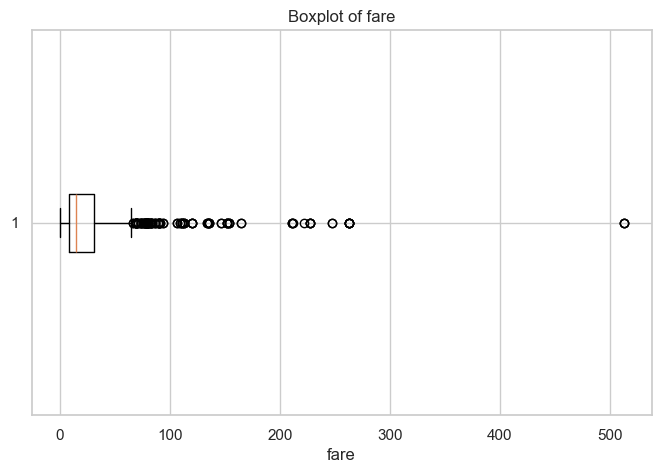


Observation:  (add your notes here)
---



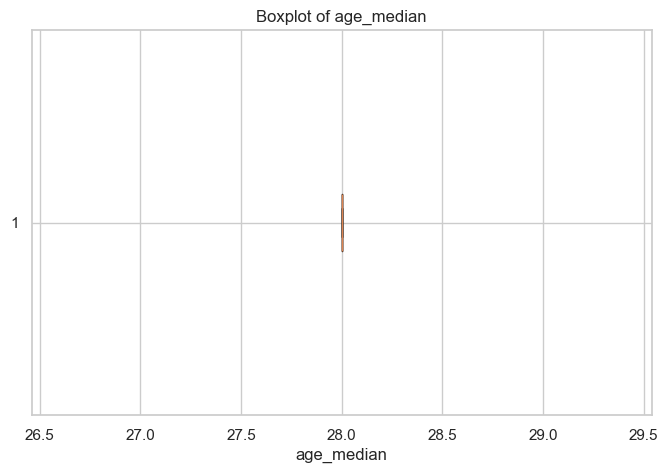


Observation:  (add your notes here)
---



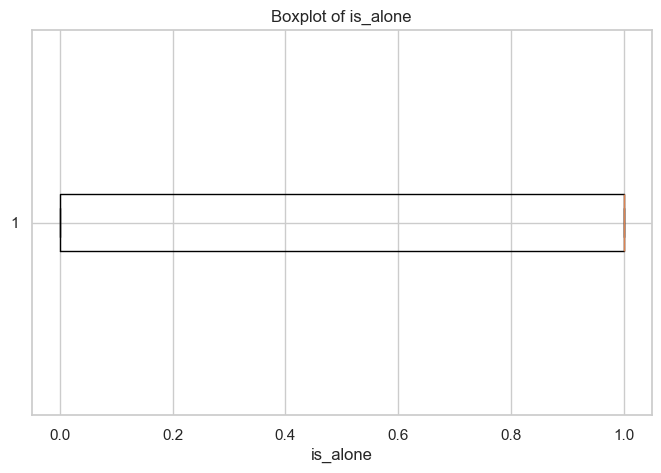


Observation:  (add your notes here)
---



In [7]:

# 7. Boxplots (to check outliers)
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df_clean[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
    print('\nObservation:  (add your notes here)\n---\n')



## Bivariate Analysis

Compare features against the target variable `survived` (or a target of your choice). Use barplots, violinplots, or grouped statistics.


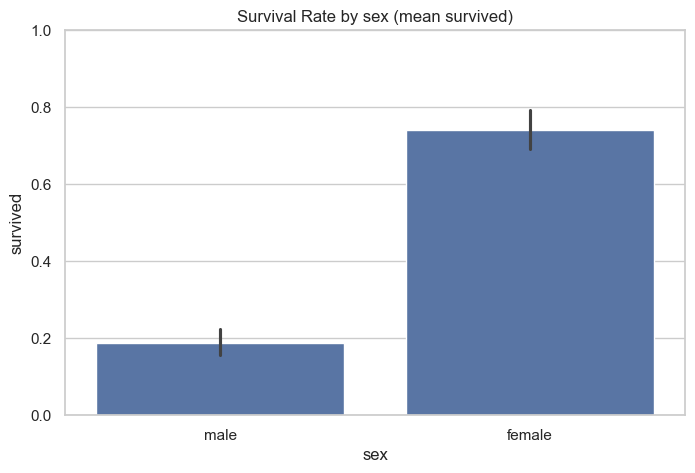


Observation:  (add your notes here)
---



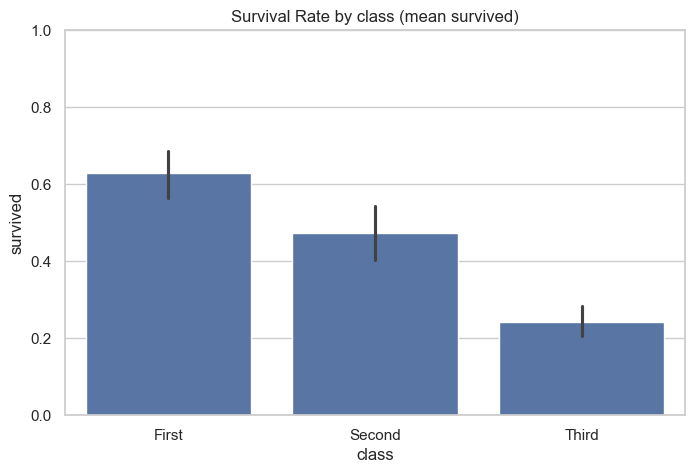


Observation:  (add your notes here)
---



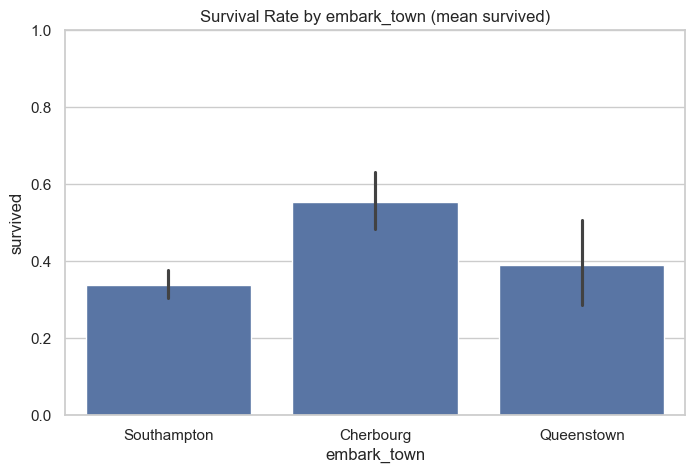


Observation:  (add your notes here)
---



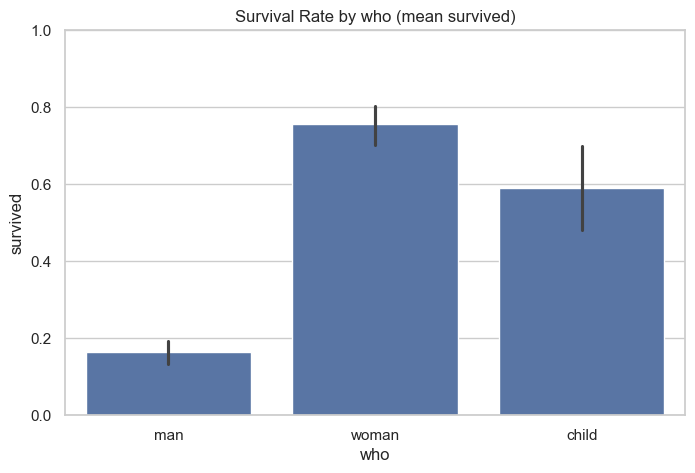


Observation:  (add your notes here)
---



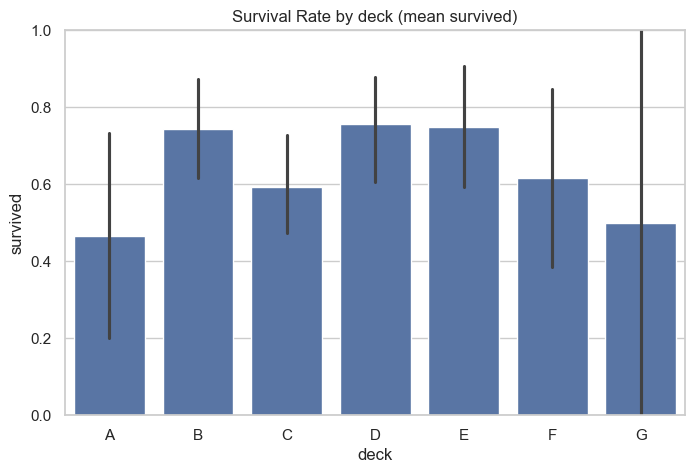


Observation:  (add your notes here)
---



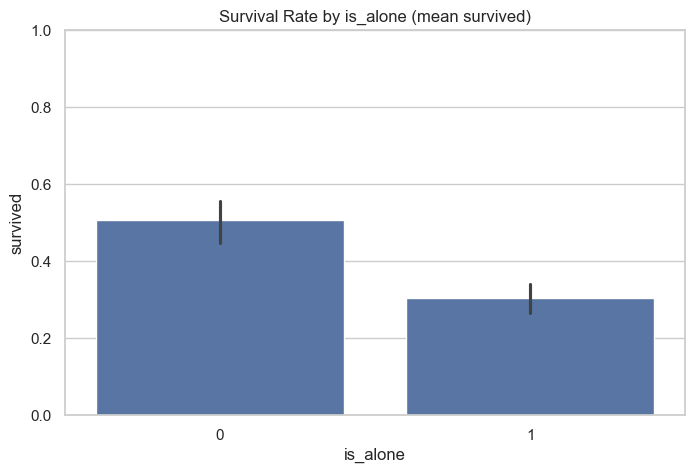


Observation:  (add your notes here)
---



In [8]:

# 8. Survival rate by categorical variables (example)
if 'survived' in df_clean.columns:
    cat_cols = ['sex','class','embark_town','who','deck','is_alone']
    for col in cat_cols:
        if col in df_clean.columns:
            plt.figure()
            sns.barplot(x=col, y='survived', data=df_clean, estimator=np.mean)
            plt.title(f'Survival Rate by {col} (mean survived)')
            plt.ylim(0,1)
            plt.show()
            print('\nObservation:  (add your notes here)\n---\n')



## Multivariate Analysis & Correlation

Use correlation matrices and heatmaps to find linear relationships between numeric features.


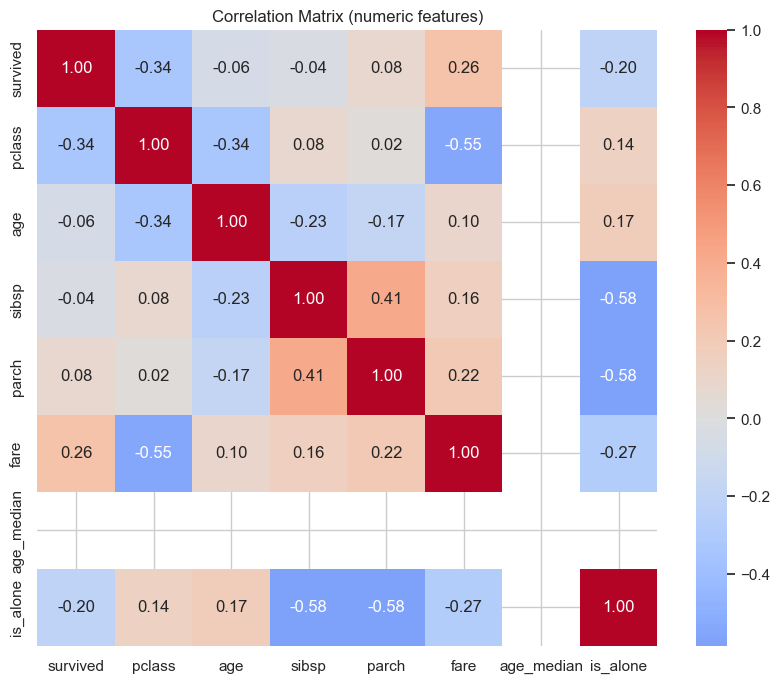


Observation:  (add your notes here)
---



In [9]:

# 9. Correlation matrix for numeric features
corr = df_clean.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (numeric features)')
plt.show()

print('\nObservation:  (add your notes here)\n---\n')


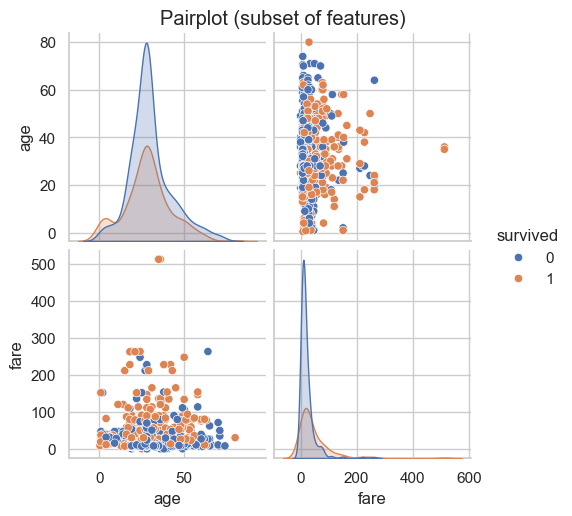


Observation:  (add your notes here)
---



In [10]:

# 10. Pairplot (use a small subset of numeric columns to avoid heavy plots)
pair_cols = ['age','fare','survived']  # modify as needed
existing = [c for c in pair_cols if c in df_clean.columns]
if len(existing) >= 2:
    sns.pairplot(df_clean[existing].dropna(), hue='survived' if 'survived' in existing else None)
    plt.suptitle('Pairplot (subset of features)', y=1.02)
    plt.show()

print('\nObservation:  (add your notes here)\n---\n')


In [ ]:

# 11. Scatterplot and regression example: age vs fare colored by survival
if set(['age','fare','survived']).issubset(df_clean.columns):
    plt.figure()
    sns.scatterplot(x='age', y='fare', hue='survived', data=df_clean, alpha=0.7)
    plt.title('Age vs Fare (colored by survival)')
    plt.show()
    print('\nObservation:  (add your notes here)\n---\n')



## Handling Skewness & Transformations

If you find skewed numeric variables (e.g., `fare`), consider log-transform or Box-Cox transform. Show before/after plots and explain the impact.


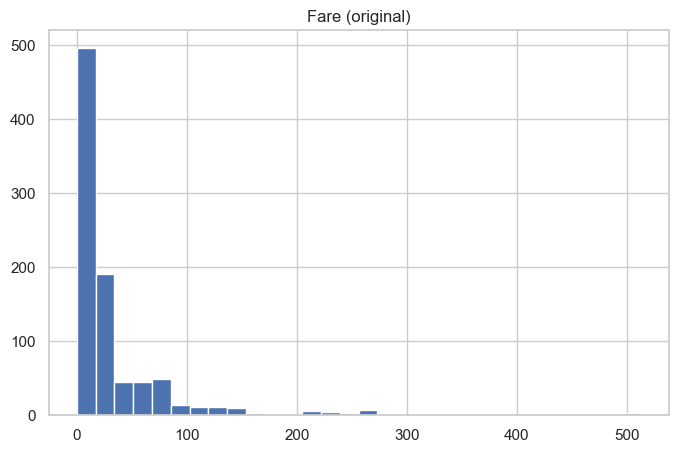

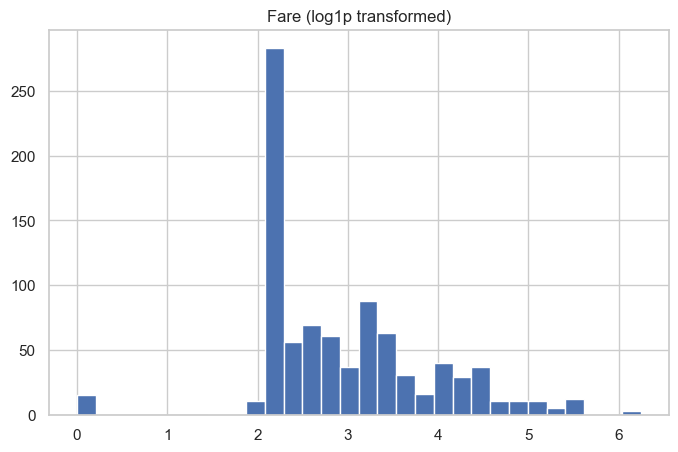


Observation:  (add your notes here)
---



In [11]:

# 12. Example: log-transform for 'fare' (if present)
if 'fare' in df_clean.columns:
    plt.figure()
    plt.hist(df_clean['fare'].dropna(), bins=30)
    plt.title('Fare (original)')
    plt.show()

    plt.figure()
    plt.hist(np.log1p(df_clean['fare'].dropna()), bins=30)
    plt.title('Fare (log1p transformed)')
    plt.show()

    print('\nObservation:  (add your notes here)\n---\n')


In [12]:

# 13. Detecting multicollinearity (VIF) - requires statsmodels
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore
    from statsmodels.tools.tools import add_constant # type: ignore
    num_df = df_clean.select_dtypes(include=[np.number]).dropna(axis=1, how='all').dropna()
    if num_df.shape[1] > 1:
        X = add_constant(num_df)
        vif_df = pd.DataFrame({'feature': X.columns, 'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] })
        display(vif_df.sort_values('VIF', ascending=False).head(15))
    else:
        print('Not enough numeric features for VIF calculation.')
except Exception as e:
    print('VIF calculation requires statsmodels. Install it if you want to run this cell.')
    print('Error:', e)


VIF calculation requires statsmodels. Install it if you want to run this cell.
Error: No module named 'statsmodels'



## Summary of Findings

- **Key insights:** (write 4-6 bullet points summarizing important observations, patterns, and anomalies)
- **Recommendations / Next steps:** (feature engineering, modelling ideas, further analysis)

---

**Example bullets you can adapt:**
- Females had higher survival rate than males.
- Passengers in higher classes had higher survival probability.
- Age shows [describe pattern].
- Fare is highly skewed; consider log-transform for modelling.

Add your final comments and export this notebook to PDF for submission.


In [4]:

# 14. Save cleaned dataset (optional)
df_clean.to_csv('titanic_cleaned.csv', index=False)
print('Saved cleaned dataset to titanic_cleaned.csv')

# 15. (Optional) Convert notebook to PDF - run from terminal:
print('\nTo convert this notebook to PDF, use (on your local machine):')
print('jupyter nbconvert --to pdf Titanic_EDA_Template.ipynb') 
print('\nOr in Google Colab: File -> Print -> Save as PDF.')


NameError: name 'df_clean' is not defined